# 期中练习

# 李睿 2021113485

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [18]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [19]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

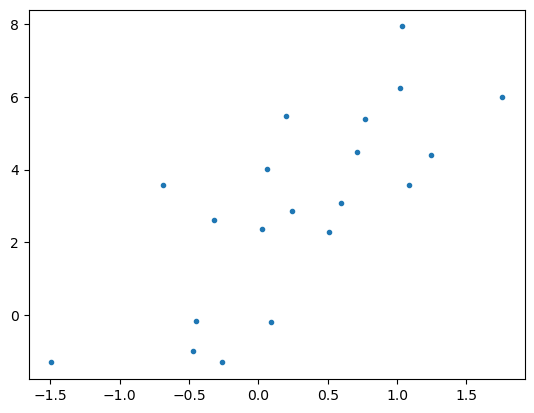

In [20]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

解题步骤：
1.将X排序，并使得X所对应的Y也要发生改变
2.划分训练集X_train、Y_train,测试集X_test、Y_test

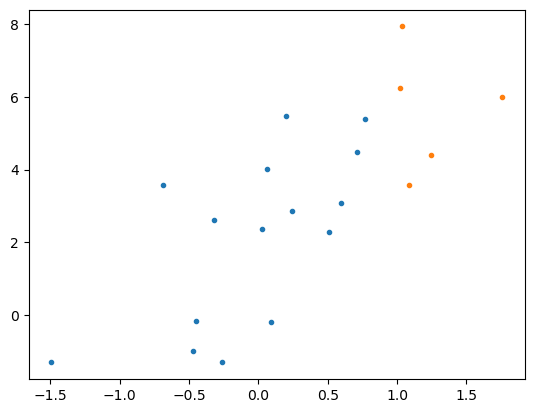

In [21]:
X_sort=np.sort(X)
# print(X_sort)

#X正序索引
X_sort_index=np.argsort(X)
# print(X_sort_index)

#根据索引修改Y
Y_sort=np.array([])
for i in X_sort_index:
    Y_sort=np.append(Y_sort,Y[i])
# print(Y_sort)

#划分测试集和训练集
X_train=X_sort[:15]
X_test=X_sort[15:]
Y_train=Y_sort[:15]
Y_test=Y_sort[15:]

plt.plot(X_train, Y_train, ".")

plt.plot(X_test, Y_test, ".")

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

答：根据均方误差可知，四次多项式模型的拟合效果最好。

1次多项式模型与训练集数据的均方差为:45.73827046440165
2次多项式模型与训练集数据的均方差为:44.71913726984472
3次多项式模型与训练集数据的均方差为:44.22717065328497
4次多项式模型与训练集数据的均方差为:42.136074026748


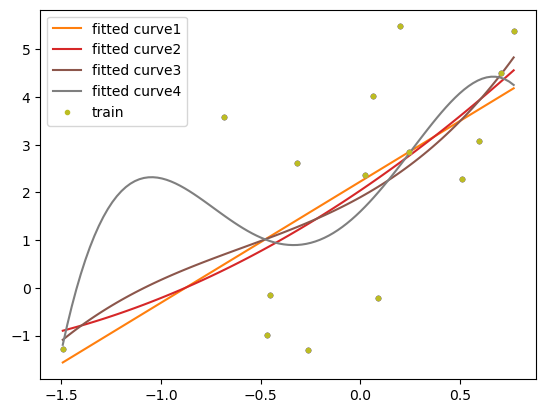

In [22]:
#先构造A矩阵
def make_A_matrix(X, n):
    rows = [X**i for i in range(n, -1, -1)]
    A = np.vstack(rows).T
    return A

#求解系数
def linear_regression(X, Y, n):
    A = make_A_matrix(X, n)
    ATA = A.T @ A
    ATy = A.T @ Y
    theta = np.linalg.solve(ATA, ATy)
    return theta

#画出模型的拟合曲线
def draw_data_and_model(X, Y, theta,i):
    x_min = X.min()
    x_max = X.max()

    X_m = np.linspace(x_min, x_max, 101)
    Y_m = model(X_m, theta)
    plt.plot(X, Y, ".")
    plt.plot(X_m, Y_m,label=f'fitted curve{i}')


#计算模型的预测值
def model(X, theta):
    total = np.zeros_like(X)
    degrees = reversed(range(len(theta)))
    for n, w in zip(degrees, theta):
        total += w * X**n
    return total

#画出拟合曲线图
for i in range(1,5):
    theta = linear_regression(X_train, Y_train, i)
    draw_data_and_model(X_train, Y_train, theta,i)
plt.plot(X_train,Y_train,'.',label='train')
plt.legend()  # 显示出曲线的名字


#定义求均方差的函数
def MSE(i,X, Y):
    Y_star = model(X,linear_regression(X_train, Y_train, i))
    E = Y - Y_star
    return np.dot(E, E)
for i in range(1,5):
    print(f'{i}次多项式模型与训练集数据的均方差为:{MSE(i, X_train,Y_train)}')

### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

答：根据均方差大小判断得出：一元线性回归的拟合效果最好。

1次多项式模型与测试集数据的均方差为:14.848179940144048
2次多项式模型与测试集数据的均方差为:22.678602973091415
3次多项式模型与测试集数据的均方差为:96.11403989464989
4次多项式模型与测试集数据的均方差为:2217.721159814587


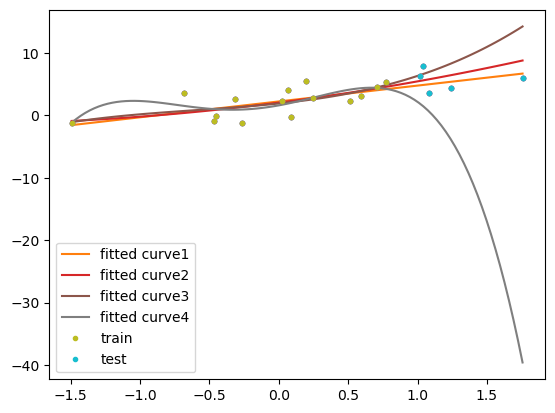

In [23]:
#定义求均方差的函数
def MSE(i,X, Y):
    Y_star = model(X,linear_regression(X_train, Y_train, i))
    E = Y - Y_star
    return np.dot(E, E)
for i in range(1,5):
    print(f'{i}次多项式模型与测试集数据的均方差为:{MSE(i, X_test,Y_test)}')

#画出拟合曲线图
for i in range(1,5):
    theta = linear_regression(X_train, Y_train, i)
    draw_data_and_model(X_sort, Y_sort, theta,i)
plt.plot(X_train, Y_train, ".",label='train')
plt.plot(X_test, Y_test, ".",label='test')
plt.legend()  # 显示出曲线的名字

1.2和1.3的答案是否相同？两者的异同有什么意义？
答：不同。
多项式函数拟合，只考虑了训练集中的数据，根据误差大小，尽量让拟合结果更加准确（即误差最小）。
多项式函数模型并没有像机器学习预测一样学习数据的变化趋势，并且存在过拟合的问题，需要选择合适的模型复杂度来平衡模型的拟合程度和泛化能力。
在实际应用中，需要谨慎选择多项式的阶数，以避免过拟合和欠拟合的问题。通常，使用交叉验证等技术来确定最优的多项式阶数，以获得更好的预测结果。

## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

答：

Sigmoid函数：
$\sigma( x ) = \frac { 1 } { 1 + e ^ { - x } }$

ReLU函数：
$\operatorname { ReLU } ( x ) = \left\{ \begin{array} { l l } { x } & { \text { if } x > 0 } \\ { 0 } & { \text { if } x \leq 0 } \end{array} \right.$

整个神经网络的公式：
$Y=ReLU(\sigma( x \cdot W_1 +B_1)\cdot W_2 +B_2)$

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [24]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [25]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [26]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [27]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [28]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [29]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [30]:
b2 = np.array([[0.277288]])

In [31]:
import numpy as np
#Sigmoid激活函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#RELU激活函数
def relu(z):
    return np.maximum(z, 0)

# 正向传播
Z1 = np.dot(X, W1) + b1
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2) + b2
Y_pred = relu(Z2)

# 计算损失
L = np.sum((Y_pred - Y)**2)

print("预测输出值：\n", Y_pred)
print("损失值：", L)


预测输出值：
 [[2.18514844]
 [1.35081552]
 [2.09965131]
 [1.98338406]]
损失值： 11.22755532709232


### 2.3 反向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [32]:

dL_dy = 2 * (Y_pred - Y)
dy_dz2 = np.where(Z2 > 0, 1, 0)
dL_dz2 = dL_dy * dy_dz2
dz2_dw2 = A1.T
dL_dw2 = np.dot(dz2_dw2, dL_dz2)
dL_db2 = dL_dz2

dz2_da1 = W2.T
dL_da1 = np.dot(dL_dz2, dz2_da1)
da1_dz1 = sigmoid(Z1) * (1 - sigmoid(Z1))
dL_dz1 = dL_da1 * da1_dz1
dz1_dw1 = X.T
dL_dw1 = np.dot(dz1_dw1, dL_dz1)
dL_db1 = dL_dz1

print("L对W1偏导数分别为：\n", dL_dw1)
print("L对B1偏导数分别为：\n", dL_db1)
print("L对W2偏导数分别为：\n", dL_dw2)
print("L对B2偏导数分别为：\n", dL_db2)

L对W1偏导数分别为：
 [[-0.40251271 -0.00182187  0.04910962 -0.51554188 -0.18737055]
 [ 0.64416028 -0.01111573  0.81370538  0.2788146   0.57317828]]
L对B1偏导数分别为：
 [[ 5.96287054e-01 -1.06079547e-02  7.92395279e-01  3.02740712e-01
   5.92534406e-01]
 [ 4.27561171e-01 -1.00047686e-03  1.54840219e-01  5.08719191e-01
   3.41974444e-01]
 [ 1.13285714e-01 -1.70961826e-03  1.21646635e-01  5.47587806e-02
   1.04113138e-01]
 [ 6.76504116e-01 -1.40129193e-02  1.10283004e+00  5.72657502e-01
   1.07059870e+00]]
L对W2偏导数分别为：
 [[4.8221678 ]
 [5.34072698]
 [2.64623548]
 [9.70428608]
 [4.25731321]]
L对B2偏导数分别为：
 [[3.67143694]
 [2.50570313]
 [0.58695233]
 [4.98073397]]
